<a href="https://colab.research.google.com/github/Ayesha52774/Healthcare_dataset/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns

# Load Titanic dataset directly
df = sns.load_dataset('titanic')

In [4]:

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

PassengerId → unique ID of each passenger  
Survived    → 0 = No, 1 = Yes  
Pclass      → passenger class (1st, 2nd, 3rd)  
Name        → passenger’s name  
Sex         → male/female  
Age         → passenger’s age (has missing values!)  
SibSp       → number of siblings/spouses aboard  
Parch       → number of parents/children aboard  
Ticket      → ticket number  
Fare        → ticket price  
Cabin       → cabin number (many missing)  
Embarked    → port of embarkation (C, Q, S)

In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Cleaning data

In [11]:
df['age'] = df['age'].fillna(df['age'].mean())

In [13]:
df.drop(columns=["deck"],inplace=True)

In [15]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

EDA

/tmp/ipython-input-18-37398773.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=df, palette='pastel')


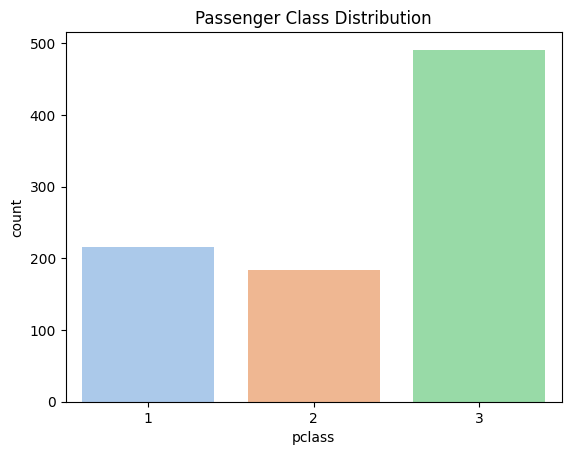

In [18]:
# passenger class distribution

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='pclass', data=df, palette='pastel')
plt.title("Passenger Class Distribution")
plt.show()

/tmp/ipython-input-22-1360802791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


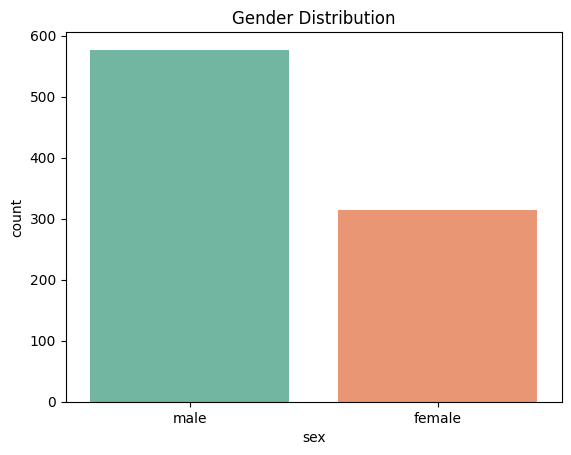

In [22]:
# Gender Distribution
sns.countplot(x='sex', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()

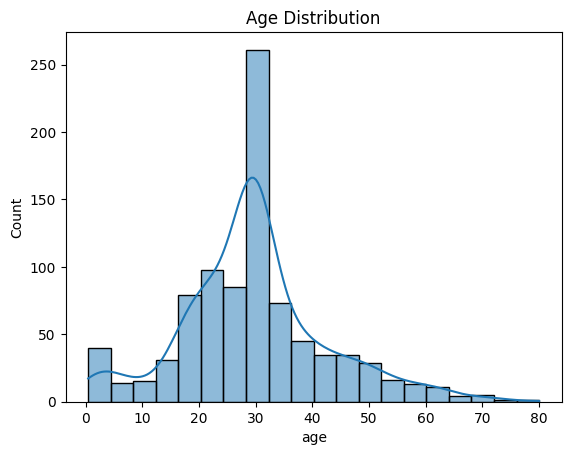

In [24]:
# age distribution
sns.histplot(df['age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

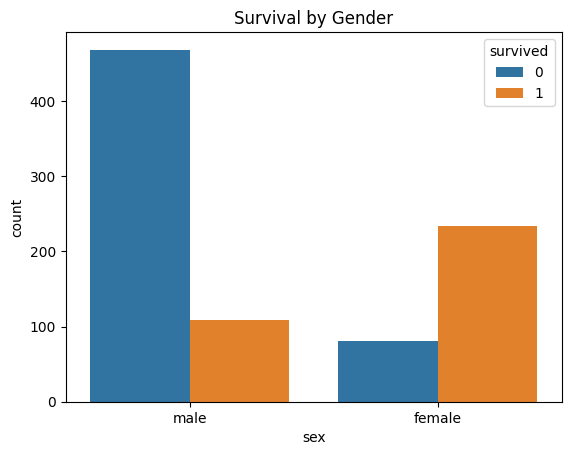

In [26]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()

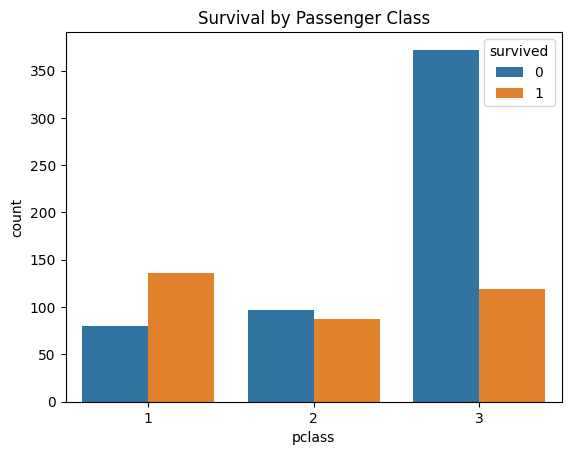

In [28]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

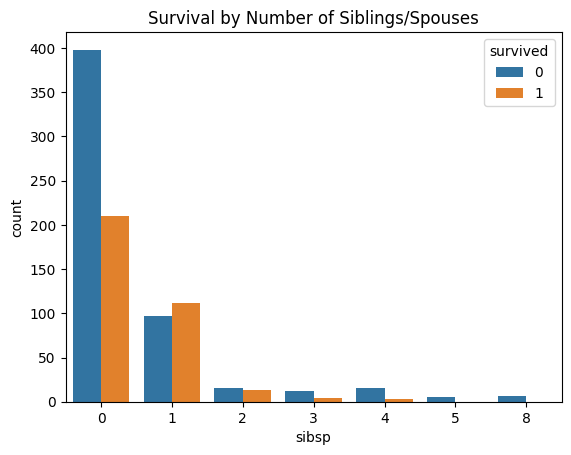

In [30]:
sns.countplot(x='sibsp', hue='survived', data=df)
plt.title("Survival by Number of Siblings/Spouses")
plt.show()

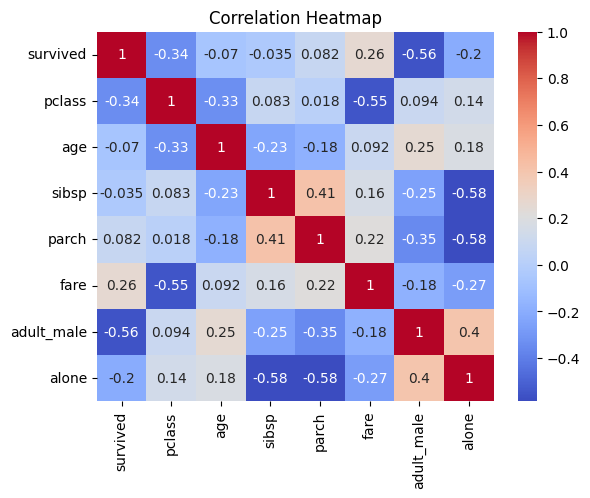

In [31]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

From the correlation heatmap, survival is negatively correlated with passenger class (-0.34) and positively correlated with fare (0.26). This means passengers in higher classes who paid higher fares had better survival chances. Age shows only a weak relationship with survival.

✅ Final Insights from Titanic EDA

1. Gender & Survival

Females had a much higher survival rate compared to males.

This reflects the “women and children first” evacuation policy.



2. Passenger Class & Survival

1st Class passengers survived more often than 2nd & 3rd class.

Passengers from 3rd class had the lowest survival chances, likely due to limited access to lifeboats.



3. Age Distribution & Survival

Most passengers were between 20–40 years old.

Children had slightly better survival chances than older adults.



4. Fare & Survival

Passengers who paid higher fares (mostly 1st class) were more likely to survive.

Lower-fare passengers (3rd class) faced higher risk.



5. Embarkation Port

Most passengers boarded at Southampton (S).

Survival rates varied slightly between ports but were mainly influenced by class & gender.



6. Family Size

Passengers with 1–2 family members had better survival chances.

Those with many family members (4+) or traveling alone had lower survival rates.



7. Key Correlations

Survived was positively correlated with Fare and negatively correlated with Pclass (higher class → higher survival).

Conclusion:
Survival on the Titanic was strongly influenced by gender, passenger class, and fare. Females and children in higher classes had the best survival chances, while males in lower classes faced the highest risk. This analysis highlights the social and economic factors that affected the outcome of the disaster.